# Exploring Tech Layoff trends from 2022

Across industries there are have been a massive increase in the number of layoffs from a wide variety of indusries.

The impact of a global pandemic can still be felt across multiple companies who had to make some tough audits and explorations regarding their workfoce and business.

There might be several facets to why these layoffs are happening but one of the observations I have noticed is that industries that experienced the most growth during the pandemic are the ones affected the most by layoffs since noe they do not require the amount of workforce they did while under lockdown.

In this notebook I will be working with a dataset from Kaggle contributed by Widya Salim, comprising of data recorded from \
#### 09/08/2022 - 01/23/2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("tech_layoffs.csv")
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


In [3]:
df.dtypes

company                          object
total_layoffs                    object
impacted_workforce_percentage    object
reported_date                    object
industry                         object
headquarter_location             object
sources                          object
status                           object
additional_notes                 object
dtype: object

In [4]:
df.describe()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
count,489,489,489,489,489,489,489,489,22
unique,477,150,50,187,289,134,221,2,22
top,Blend,Unclear,Unclear,1/11/2023,Fintech,San Francisco,TechCrunch,Private,The company previously laid off workers in May.
freq,2,182,133,12,24,136,52,370,1


###### The reason we cannot see all of the statictics as usual is because our entire datset has a datatype of "object"
We can convert the columns into integers that are indeed integers 

## Data Preparation
Let us take a look at the data again and see if there are any columns we need/not need, null/NaN values etc...

In [5]:
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


#### It seems like whatever analysis we would be doing, we would not need "additional_notes" column
Let's drop it

In [6]:
df.drop("additional_notes", axis=1, inplace=True)

In [7]:
df.head()

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private


Renaming columns to look to presentable

In [8]:
df = df.rename(columns={'company':'Company', 'total_layoffs':'Total_Layoffs', 
                'impacted_workforce_percentage':'Impacte_ Workforce_Percentage',
                'reported_date':'Reported_Date', 'industry':'Industry', 'headquarter_location':'Headquarter_Location', 
                'sources':'Sources', 'status':'Status'})

In [9]:
df.head()

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private


In [10]:
df.isna().sum()

Company                          0
Total_Layoffs                    0
Impacte_ Workforce_Percentage    0
Reported_Date                    0
Industry                         0
Headquarter_Location             0
Sources                          0
Status                           0
dtype: int64

#### Dealing with "Unclear" (null) values

In [11]:
index_for_null_values = df[(df['Impacte_ Workforce_Percentage'] == "Unclear") & (df['Total_Layoffs'] == "Unclear")].index

Let's remove entries that have both "Total_Layoffs" and "Impacte_ Workforce_Percentage" as "Unclear" since we do not have any proof to signify whether layoffs happened at these companies

In [12]:
df.drop(index_for_null_values , inplace=True)

In [13]:
df.head()

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private


In [14]:
(df['Total_Layoffs']=="Unclear").value_counts()

False    307
True     116
Name: Total_Layoffs, dtype: int64

In [15]:
(df['Impacte_ Workforce_Percentage']=="Unclear").value_counts()

False    356
True      67
Name: Impacte_ Workforce_Percentage, dtype: int64

In [16]:
df['Impacte_ Workforce_Percentage'] = df['Impacte_ Workforce_Percentage'].str.replace('Unclear', '0')
df['Total_Layoffs'] = df['Total_Layoffs'].str.replace('Unclear', '0')

To aid our analysis and exploration, we converted all "Unclear" values into 0.
In a real world scenario, we would need to carefully consider this descision as it could impact our outpu

In [17]:
df.head()

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,0,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private


#### Checking for duplicate values

In [18]:
df.loc[df.duplicated()]

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status


Seems like there are no duplicate rows in our data set

To be sure let's check if our company column has any duplicate values, since we know that company name should always be unique

In [19]:
df.loc[df.duplicated(subset=['Company'])]

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status
69,Gemini,0,10,6/2/2022,"Fintech, Crypto",New York,Bloomberg,Private
92,Thirty Madison,0,13,8/18/2022,"health care, wellness",Greater New York area,Fierce Healthcare,Private
185,Homeward,0,25,11/16/2022,Proptech,"Austin, TX",Homeward,Private
188,DataRobot,0,26,8/23/2022,"AI, enterprise software",Boston,The Information,Private
201,Socure,173,32,1/5/2023,Identity verification,Reno,Biometric Update,Private
211,TruePill,0,33,9/30/2022,"pharmaceutical, health care","Hayward, CA",TechCrunch,Private
249,Argo AI,0,100,10/26/2022,Transportation,Pittsburgh,TechCrunch,Private
300,On Deck,73,0,8/4/2022,"Networking, business development",San Francisco,TechCrunch,Private
451,Blend,0,28,1/10/2023,"Fintech, proptech",San Francisco,Inman,Public
458,Latch,115,37,8/2/2022,PropTech,"New York, NY",Latch,Public


In [20]:
df.query('Company == "Gemini" ')

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status
29,Gemini,68,7,7/18/2022,Crypto,New York,TechCrunch,Private
69,Gemini,0,10,6/2/2022,"Fintech, Crypto",New York,Bloomberg,Private


In [21]:
df.query('Company == "Thirty Madison" ')

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private
92,Thirty Madison,0,13,8/18/2022,"health care, wellness",Greater New York area,Fierce Healthcare,Private


Seems like the reason we have duplicate entries for Companies is the sources via which he data is derived

In [22]:
df.query('Company == "Homeward" ')

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status
141,Homeward,120,20,8/11/2022,"Real Estate, PropTech",Austin,The Real Deal,Private
185,Homeward,0,25,11/16/2022,Proptech,"Austin, TX",Homeward,Private


#### After looking at duplicate values for some of the companies, our observation is as follows:

### Observation:
For every duplicate company record, the source is different.

Due to this the values or each column is different as well.

On pattern that we observe is the second occurence of each company is less potent that thee first record

For example :- First occuurence for "Thirty Madison" brought to us via "Axios" gives us Total_Layoffs and Impacted_Workforce_Percentage (hopeefully  correct).
But the second occurence for "Homeward" brought to us via "Fierce Healthcare" gives us the Total_Layoffs but not Impacted_Workforce_Percentage

This might entail that the second record is inaccurate.

On this assumption we would be dropping the second occurence of every duplicate company

##### Note: In a real life scenario, this assumption should be discussed with a domain expert who can better guide us on which source is trusstworthy

In [23]:
df = df.loc[~df.duplicated(subset=['Company'])].reset_index(drop=True)

## Feature Exploration

Let's look at some of the important features and try to derive important insights from them

In [24]:
df['Industry'].value_counts()

Fintech                              24
Health Care                          12
PropTech                             11
E-commerce                           10
Cybersecurity                         9
                                     ..
productivity, enterprise software     1
Data Analytics                        1
IT, future of work                    1
fintech, money transfer               1
AI, health care                       1
Name: Industry, Length: 251, dtype: int64

###### Let's plot Top 10 industires with maximum layoffs

Text(0, 0.5, 'Number of layoffs')

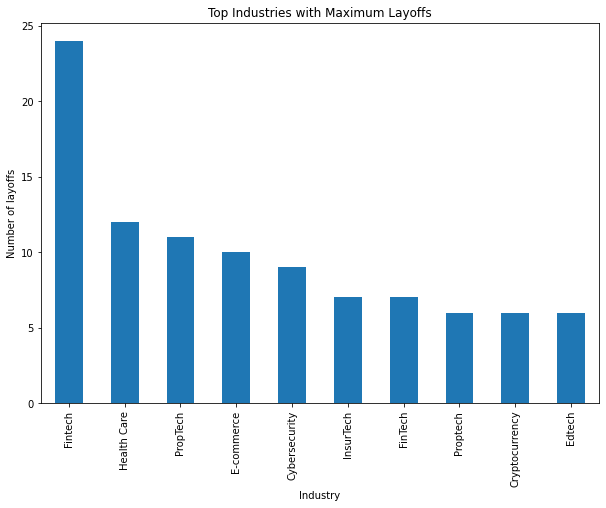

In [25]:
plt.rcParams['figure.figsize'] = [10, 7]
plot_for_industry = df['Industry'].value_counts().head(10).plot(kind='bar', title = "Top Industries with Maximum Layoffs")
plot_for_industry.set_xlabel("Industry")
plot_for_industry.set_ylabel("Number of layoffs")

In [26]:
df["Impacte_ Workforce_Percentage"] = pd.to_numeric(df["Impacte_ Workforce_Percentage"])
df["Total_Layoffs"] = pd.to_numeric(df["Total_Layoffs"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Company                        413 non-null    object
 1   Total_Layoffs                  413 non-null    int64 
 2   Impacte_ Workforce_Percentage  413 non-null    int64 
 3   Reported_Date                  413 non-null    object
 4   Industry                       413 non-null    object
 5   Headquarter_Location           413 non-null    object
 6   Sources                        413 non-null    object
 7   Status                         413 non-null    object
dtypes: int64(2), object(6)
memory usage: 25.9+ KB


In [27]:
df.head()

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,0,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private


### Working with "Reported_Date" column

In [28]:
df["Reported_Date"] = pd.to_datetime(df["Reported_Date"]) #yyyy-mm-dd

In [29]:
df.head()

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private
1,VideoAmp,0,2,2022-09-19,Advertising platforms,Los Angeles,Company memo,Private
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Axios,Private


##### Let's create three new features -> "Year", "Month" and "Week"

In [30]:
df["Year"] = df["Reported_Date"].dt.year
df["Month"] = df["Reported_Date"].dt.month
df["Week"] = df["Reported_Date"].dt.week

In [31]:
df.head()

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status,Year,Month,Week
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022,12,49
1,VideoAmp,0,2,2022-09-19,Advertising platforms,Los Angeles,Company memo,Private,2022,9,38
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private,2022,8,33
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private,2023,1,3
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Axios,Private,2022,5,19


In [32]:
df_copy = df.copy()

In [33]:
df_copy = df_copy.loc[df_copy["Total_Layoffs"] != 0]

In [34]:
df_copy.head()

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status,Year,Month,Week
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022,12,49
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private,2022,8,33
3,Addepar,20,3,2023-01-18,"fintech, data analytics","Mountain View, CA",Fortune,Private,2023,1,3
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Axios,Private,2022,5,19
6,Armis Security,25,4,2022-12-08,Cybersecurity,San Francisco,Calcalistech,Private,2022,12,49


Since we do not have sufficient data for 2023 as the year has just begun, let's try to explore the year of 2022

### Plotting the trend in layoffs for year 2022

In [35]:
df_for_2022 = df.loc[df["Year"]!=2023]
df_for_2022.head()

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status,Year,Month,Week
0,C2FO,20,2,2022-12-09,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,2022,12,49
1,VideoAmp,0,2,2022-09-19,Advertising platforms,Los Angeles,Company memo,Private,2022,9,38
2,Amperity,13,3,2022-08-20,"Saas, analytics",Seattle,Geekwire,Private,2022,8,33
4,Thirty Madison,24,3,2022-05-13,Health Care,New York,Axios,Private,2022,5,19
5,NextRoll,0,3,2022-07-08,Marketing Tech,San Francisco,Business Insider,Private,2022,7,27


In [36]:
df_grouped = df.groupby("Month")["Total_Layoffs"]
df_sum_of_layoffs_by_month = df_grouped.sum().reset_index()

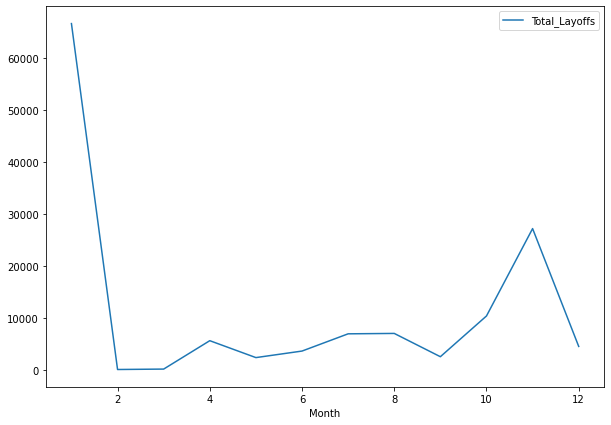

In [37]:
df_sum_of_layoffs_by_month.plot(kind="line", x="Month", y="Total_Layoffs")

## Deriving statistically significant data

In [38]:
top_10_industries = df["Industry"]

In [39]:
ind = []
for i in df['Industry'].to_list():
    if "," in i:
        ind.append(i.split(',')[-1])
    else:
        ind.append(i)
    
ind = [x.capitalize() for x in ind]
# ind = [x.replace("-", "") for x in ind]

df['Industry'] = ind

In [40]:
location = []
for i in df['Headquarter_Location'].to_list():
    if "," in i:
        location.append(i.split(',')[0])
    else:
        location.append(i)
    
location = [x.capitalize() for x in location]
# ind = [x.replace("-", "") for x in ind]

df['Headquarter_Location'] = location

In [41]:
df.head()

,Company,Total_Layoffs,Impacte_ Workforce_Percentage,Reported_Date,Industry,Headquarter_Location,Sources,Status,Year,Month,Week
0,C2FO,20,2,2022-12-09,payments,Leawood,Kansas City Business Journal,Private,2022,12,49
1,VideoAmp,0,2,2022-09-19,Advertising platforms,Los angeles,Company memo,Private,2022,9,38
2,Amperity,13,3,2022-08-20,analytics,Seattle,Geekwire,Private,2022,8,33
3,Addepar,20,3,2023-01-18,data analytics,Mountain view,Fortune,Private,2023,1,3
4,Thirty Madison,24,3,2022-05-13,Health care,New york,Axios,Private,2022,5,19


In [42]:
top_10_industries = df["Industry"].value_counts().head(9)

### Let's see the top 9 industries impacted by layoffs

In [43]:
top_10_industries_df = top_10_industries.reset_index()
top_10_industries_df.columns = ['Industry', 'Occurence']

Text(0.5, 1.0, 'Top 10 Layoff Industries')

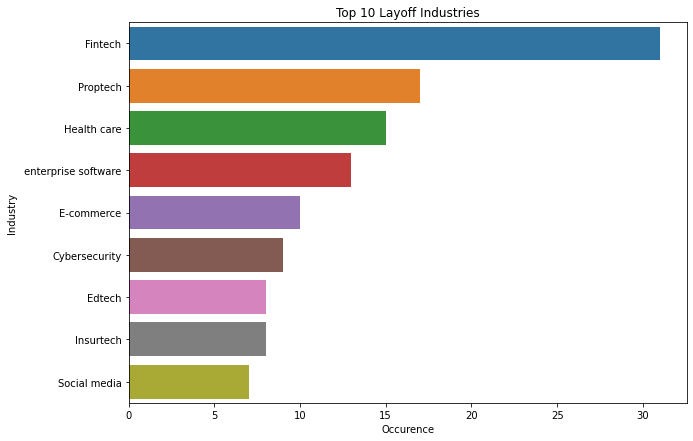

In [44]:
sns.barplot(x="Occurence",y="Industry", data=top_10_industries_df)
plt.title("Top 10 Layoff Industries")

##### Note: y-axis does not represent the number of layoffs from particular industry. It indicates the frequency at which the specific industry has occured in our dataset

### The Top 9 Industries impacted by layoffs:
1. Fintech (payment platforms, finance analytics etc..)
2. Proptech 
3. Health Care
4. Enterprise Software
5. E-commerece
6. Cybersecurity
7. Edtech
8. Insurtech
9. Media and Entertaainment

### Let's see the top 9 Companies impacted by layoffs

In [45]:
top_10_companies = df.sort_values(by="Total_Layoffs", ascending=False).head(10)

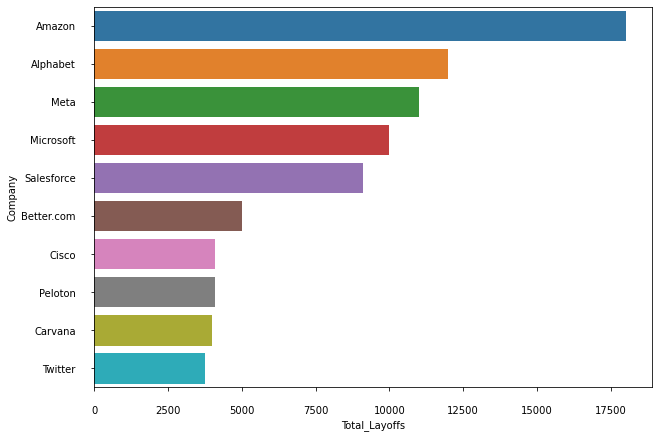

In [46]:
ax = sns.barplot(x="Total_Layoffs", y="Company", data=top_10_companies)
ax.tick_params(axis='both', which='major', pad=15)

### The Top 9 Companies impacted by layoffs:
1. Amazon
2. Alphabet 
3. Microsoft
4. Salesforce
5. Better.com
6. Cisco
7. Peleton
8. Carvana
9. Twitter

### Let's see the top 9 Cities impacted by layoffs

In [47]:
top_10_cities = df.sort_values(by="Total_Layoffs", ascending=False).head(10)

Text(0.5, 1.0, 'Impacted cities by layoffs')

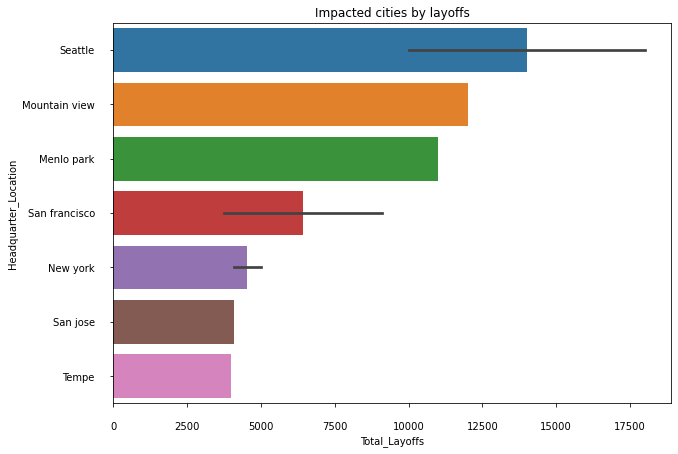

In [48]:
ax = sns.barplot(x="Total_Layoffs", y="Headquarter_Location", data=top_10_cities)
ax.tick_params(axis='both', which='major', pad=15)
plt.title("Impacted cities by layoffs")

### The Top Cities impacted by layoffs:
1. Seattle
2. Mountain View 
3. Menlo Park
4. San Francisco
5. New York
6. San Jose
7. Tempe

Let's utilize the "Source" column to derive potentially important statistic

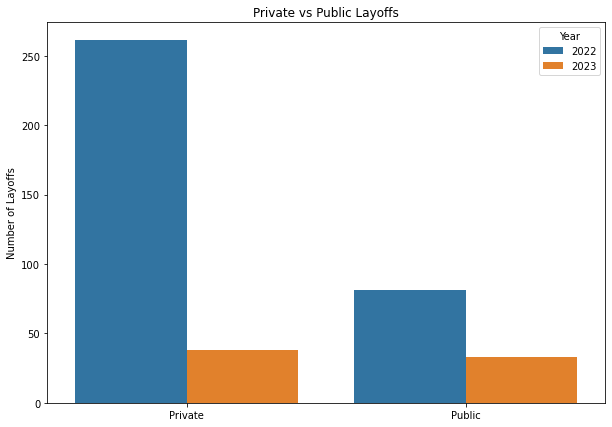

In [49]:
sns.countplot(x="Status", data=df, hue="Year")
plt.title("Private vs Public Layoffs")
plt.xlabel('')
plt.ylabel('Number of Layoffs')
plt.show()

##### Private sector has had significantly large amount of layoffs as compared to Public sector

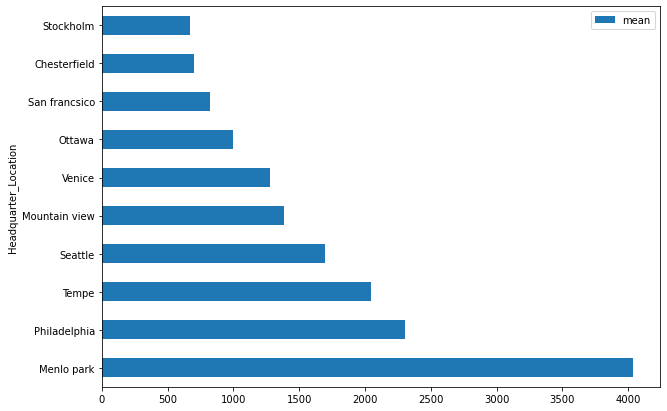

In [50]:
grouped = df.groupby("Headquarter_Location")["Total_Layoffs"].agg(['mean']).sort_values('mean',ascending=False).head(10)
grouped.plot(kind='barh')
# grouped

##### With this we come to the end of our exploration.

We are able to derive some important statistics out of our data like top industries and companies impacted, top cities and also the sectors that went under maximum layoffs

There can certainly be more in-depth analysis about our dataset but it would help if we had more features like total employees at the company
